In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

import vtk
import csv

ModuleNotFoundError: No module named 'vtkOpenGLKitPython'

In [ ]:
def vtkToCSV(fileIn, fileOut):
    reader = vtk.vtkGenericDataObjectReader()
    reader.SetFileName(fileIn)
    reader.Update()

    point_obj = reader.GetOutput()
    points = point_obj.GetPoints()

    table = vtk.vtkDataObjectToTable()
    table.SetInputData(point_obj)
    table.Update()
    table.GetOutput().AddColumn(points.GetData())
    table.Update()

    writer = vtk.vtkDelimitedTextWriter()
    writer.SetInputConnection(table.GetOutputPort())
    writer.SetFileName(fileOut)
    writer.Update()
    writer.Write()

In [ ]:
    general_path =  '/home/granular/LIGGGHTS/ver/post/dump43000.'
fileIn = general_path + 'vtk'
fileOut  =  general_path + 'csv'

r1 = 0.001
r2 = 0.006
rhoParticle = 2500
mass_small = 4.19*(r1**3)*rhoParticle
mass_large = 4.19*(r2**3)*rhoParticle
mass_large
fileIn

In [ ]:
vtkToCSV(fileIn,fileOut)

In [ ]:
d140 = pd.read_csv(fileOut)
d140.head()

In [ ]:
plt.figure(figsize=(15,10))

In [ ]:
plt.subplot2grid((1,1), (0,0))
d140.radius.value_counts(normalize=True).plot(kind="bar")
plt.title("Survived")

In [ ]:
data = d140.rename(columns={'Points:0' : 'x', 'Points:1' : 'y', 'Points:2' : 'z'})

In [ ]:
N = 10
height = (data['z'].max()+0.0001)/N
breakpoint = []
for i in range(0,N):
    breakpoint.append(height*(i+1))
# print(height)
# breakpoint = [height, height*2, height*3, height*4, height*5]
breakpoint

In [ ]:
from bisect import bisect

def grade(score, breakpoints=breakpoint, marks='abcdefghij'):
#         print(score)
        i = bisect(breakpoints, score)
#         print(marks[i])
        return marks[i]

In [ ]:
s = d140[(d140.radius <= 0.006 )]
# smaller.head(5)

l = d140[(d140.radius >= 0.006 )]
l.head(5)

smaller = s.rename(columns={'Points:0' : 'x', 'Points:1' : 'y', 'Points:2' : 'z'})
larger = l.rename(columns={'Points:0' : 'x', 'Points:1' : 'y', 'Points:2' : 'z'})

larger.info()

In [ ]:
a,b,c,d,e, f, g, h, i, j= [], [], [] ,[], [],[], [], [] ,[], []
small_lists = [a,b,c,d,e, f, g, h, i, j]
marks = 'abcdefghij'
for item in [(grade(score),score) for score in smaller.z ]:
    l = marks.index(item[0])
    small_lists[l].append(item[1])
    
a,b,c,d,e, f, g, h, i, j= [], [], [] ,[], [],[], [], [] ,[], []
large_lists = [a,b,c,d,e, f, g, h, i, j]  
for item in [(grade(score),score) for score in larger.z ]:
    l = marks.index(item[0])
    large_lists[l].append(item[1])


In [ ]:
# small_sub = [ len(small_lists[0]),len(small_lists[1]),len(small_lists[2]),len(small_lists[3]),len(small_lists[4]), 
#             len(small_lists[5]),len(small_lists[6]),len(small_lists[7]),len(small_lists[8]),len(small_lists[9])]
small_sub = []
large_sub = []
for i in range(0,N):
    small_sub.append(len(small_lists[i]))
    large_sub.append(len(large_lists[i]))

counter = [small_sub, large_sub]
counter

In [ ]:
ratios = []
normalVal = []
for i in range(0, N):
    ratios.append(((small_sub[i]*mass_small)/(small_sub[i]*mass_small + large_sub[i]*mass_large))/0.5)
    normalVal.append(1)
ratios
    

In [ ]:
names = ['0.05', '0.15', '0.25', '0.35', '0.45', '0.55', '0.65', '0.75', '0.85', '0.95']

fig, ax = plt.subplots()
fig.suptitle('Plot vel. = 2 m/s, Particle radius: 3-6mm')
ax.scatter( names,ratios, label="", marker='d')
ax.plot( names,normalVal, label="", color='g', linestyle='dashed')

plt.legend(loc='lower right')
plt.ylabel("Normalised fine particle mass fraction")
plt.xlabel("Normalised axial position (y/h)")
plt.savefig('../../BTP/salma/nishant_data/a-8-f-24.svg', format='svg')
plt.show()

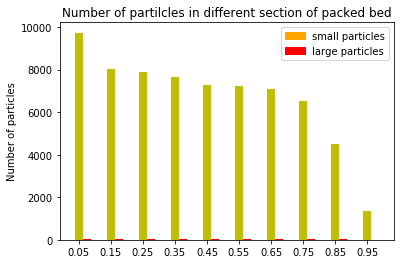

In [79]:
colors = {'small particles':'orange', 'large particles':'red'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

X = np.arange(10)

plt.ylabel('Number of particles')
plt.title('Number of partilcles in different section of packed bed')
plt.xticks(X, ('0.05', '0.15', '0.25', '0.35', '0.45', '0.55', '0.65', '0.75', '0.85', '0.95'))

plt.bar(X + 0.00, counter[0], color = 'y', width = 0.25)
plt.bar(X + 0.25, counter[1], color = 'r', width = 0.25)

plt.show()

In [80]:
import math
def get_si(counter):
    p = 0
    for i in range(0, len(ratios)):
#         print(counter[1][i])
        p = p + ((ratios[i]) - 1) ** 2
        print(p)
    p = p/len(ratios)
    return math.sqrt(p)

si = get_si(counter)
si

0.06288600011196453
0.08260397129630004
0.08946023321361923
0.08952070016359372
0.09329373833466628
0.09382292508998241
0.10374037265690308
0.10566409782084538
0.16327220279146187
0.16660293393374298


0.12907475893207895

In [81]:
rat_32_1 = [1.5789473684210527, 0.4, 0.046511627906976744, 0.055248618784530384, 0.5029239766081872, 1.0955165692007798, 1.3879781420765027, 1.6444444444444444, 1.9382239382239381, 2.0]
rat_32_2 = [1.606060606060606,0.5964912280701754,0.0425531914893617,0.010968921389396709,0.17142857142857143,0.8594059405940595,1.5488721804511276,1.9094339622641507,1.9694656488549618,2.0]
rat_35_1 = [1.4307116104868915, 0.5566218809980806, 0.072992700729927, 0.015748031496062992, 0.19130434782608693, 0.9861386138613862, 1.5773584905660376, 1.8780952380952383, 2.0, 2.0]
rat_35_2 = [1.2481203007518797, 0.47780126849894294, 0.0966542750929368, 0.043392504930966476, 0.40625, 1.0495049504950498, 1.2822429906542057, 1.752895752895753, 2.0, 2.0]
rat_3_1 = [1.594541910331384, 0.3582089552238806, 0.038528896672504385, 0.03125, 0.4888888888888889, 1.1496062992125984, 1.4142581888246628, 1.7566539923954372, 1.9375, 1.9255813953488372]
rat_3_2 = [1.758490566037736, 0.8637236084452976, 0.07665505226480836, 0.0, 0.1705989110707804, 0.9421487603305786, 1.265774378585086, 1.6569200779727093, 1.9080459770114941, 2.0]
rat_4 = [0.6337760910815938, 0.5508317929759705, 0.11406844106463879, 0.04735883424408015, 0.41467889908256883, 1.1719038817005545, 1.8850987432675044, 2.0, 2.0, 2.0]
rat_45 = [0.5777777777777778, 0.27360308285163776, 0.061538461538461535, 0.05273833671399595, 0.3283582089552239, 1.1059730250481694, 1.8467432950191571, 2.0, 2.0, 2.0]
rat_48 = [0.0535279805352798, 0.027397260273972605, 0.0, 0.04143126177024482, 0.4852071005917159, 1.493482309124767, 2.0, 2.0, 2.0, 2.0]

rec_14 = [1.0233393177737882, 0.0392156862745098, 0.03717472118959107, 0.1037037037037037, 0.5854616895874263, 1.3320079522862822, 1.5581854043392505, 1.8128654970760234, 1.7602996254681649, 1.908831908831909]
rec_18 = [0.6817447495961227, 0.0, 0.048109965635738834, 0.41391304347826086, 1.1028037383177571, 1.4619469026548673, 1.5485008818342152, 1.800711743772242, 1.6988235294117646, 1.5061728395061726]
rec_2 = [0.6334519572953737, 0.014598540145985401, 0.15151515151515155, 0.5151515151515151, 1.060665362035225, 1.3295238095238096, 1.4744525547445255, 1.6155268022181146, 1.5644283121597096, 1.811764705882353]
rec_25 = [0.15242494226327943, 0.01697792869269949, 0.15151515151515155, 0.4496124031007752, 1.0130841121495326, 1.3235294117647058, 1.6119402985074627, 1.8208955223880599, 1.9699248120300752, 2.0]
f_10 =   [1.2473363264759099, 0.9566543790517352, 0.9981963411491884, 1.0224980605120249, 1.086973229153324, 1.1534563146158525, 1.1284087211194274, 0.8902109248242295, 0.4804469273743017, 0.16517225106182162]
f_12 =   [1.5124497425407353,1.2715520269795548,1.1249746809803527,1.0271522326598894,0.9584086799276674,0.855268138801262,0.914867617107943,0.8416596104995767,0.5977357295542712,0.5230769230769231]
f_14 =   [1.6094032549728752,1.290792291220557,1.0551431601272534,0.9825033647375505,0.9652359681491554,0.9632975719932241,0.907674434497369,0.8456507981154633,0.6054292002934704, 0.5135483870967743]
f_18 = [1.4228456913827656,1.1599416626154595,1.1121819856849267,1.0395998332638599,0.9283196239717979,0.8901541452576032,0.8677019854531158,0.9146507788385616,0.8693565976008726,0.6047638272103352]
f_24 = [1.2507708119218912,1.1404206935758954,1.0828025477707008,0.9922239502332816,0.9385749385749386,0.9769959404600812,0.9004136175628381,0.9561397085743575,0.7599831152384973,0.9422875131164744]
si_f_12 = np.array([0.3301653989451871, 0.3085716907449433,0.2977421643194421, 0.20827950740706375, 0.12907475893207895])

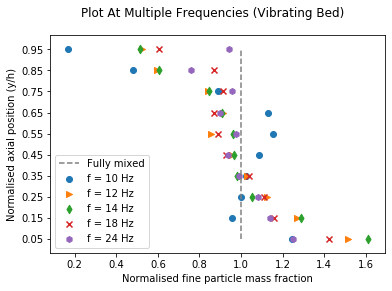

In [84]:
names = ['0.05', '0.15', '0.25', '0.35', '0.45', '0.55', '0.65', '0.75', '0.85', '0.95']

fig, ax = plt.subplots()
fig.suptitle('Plot At Multiple Frequencies (Vibrating Bed)')
ax.scatter(f_10, names, label="f = 10 Hz", marker='o')
# ax.scatter(names, rec_18, label="u = 1.8 m/s", marker='d')
# ax.scatter(names, rec_2, label="u = 2 m/s", marker='o')
ax.scatter( f_12, names,label="f = 12 Hz", marker='>')
# ax.scatter(names, rat_45, label="u = 4.5 m/s", marker='x')
# ax.scatter(names, rat_48, label="u = 4.8 m/s", marker='h')
ax.scatter( f_14, names,label="f = 14 Hz", marker='d')
ax.scatter( f_18, names,label="f = 18 Hz", marker='x')
ax.scatter( f_24, names,label="f = 24 Hz", marker='h')

ax.plot( normalVal,names, label="Fully mixed", color='grey', linestyle='dashed')

plt.legend(loc='lower left')
plt.xlabel("Normalised fine particle mass fraction")
plt.ylabel("Normalised axial position (y/h)")
# plt.savefig('../graphs/RecU-1425_3_6_velocity_compare.svg', format='svg')
plt.savefig('../../BTP/salma/nishant_data/multiple-frequency.svg', format='svg')
plt.show()

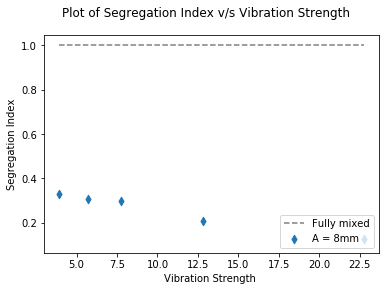

In [51]:
# vibst = ['3.94784176', '5.68489213', '7.73776985', '12.7910073', '22.7395685']
vibst = np.array([3.94, 5.68, 7.73, 12.79, 22.73])
fig, ax = plt.subplots()
fig.suptitle('Plot of Segregation Index v/s Vibration Strength')
ax.scatter(vibst, si_f_12, label="A = 8mm", marker='d')
normalVal = [1, 1, 1, 1, 1]
ax.plot(vibst, normalVal, label="Fully mixed", color='grey', linestyle='dashed')

plt.legend(loc='lower right')
plt.ylabel("Segregation Index")
plt.xlabel("Vibration Strength ")
# plt.savefig('../graphs/RecU-1425_3_6_velocity_compare.svg', format='svg')
# plt.savefig('../../BTP/salma/nishant_data/si-vibration-strength.svg', format='svg')
plt.show()